### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
tf.config.run_functions_eagerly(True)
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Number 1. Conduct an experiment for RNN

### Daily Temperature Dataset

In [2]:
# Sample data (daily temperature in a time series)
data = np.array([35, 35, 35, 34, 36, 36, 34, 34, 36, 33,
                36, 35, 35, 35, 34, 34, 35, 35, 35, 34,
                36, 35, 36, 35, 36, 35, 36, 36, 36, 36])

sequence_length = 5

### Prepare Data

In [3]:
def prepare_data(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

X, y = prepare_data(data, sequence_length)

### Model RNN

In [4]:
model = Sequential()
model.add(SimpleRNN(100, activation = 'relu',input_shape = (sequence_length, 1)))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')
model.fit(X.reshape(-1, sequence_length, 1), y, epochs = 100, verbose = 0)

loss = model.evaluate(X.reshape(-1, sequence_length, 1), y)
print("Loss on training data:", loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.8755
Loss on training data: 0.8755278587341309


In [5]:
# Making predictions for the next value
next_sequence = np.array([34, 36, 36, 34, 34])
next_sequence = next_sequence.reshape(1, sequence_length, 1)
predicted_temperature = model.predict(next_sequence) #34
print("Predicting the next temperature:", predicted_temperature[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicting the next temperature: 34.50694


## Number 2. Find the parameters with the smallest loss

### RNN Model with Data Standardization

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_reshaped = data.reshape(-1, 1)
data_scaled = scaler.fit_transform(data_reshaped).flatten()

def prepare_data(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

X, y = prepare_data(data_scaled, sequence_length)

model = Sequential()
model.add(SimpleRNN(100, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X.reshape(-1, sequence_length, 1), y, epochs=150, verbose=0)

loss = model.evaluate(X.reshape(-1, sequence_length, 1), y)
print("Loss on training data:", loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0155
Loss on training data: 0.01546311005949974


In [7]:
next_sequence = np.array([34, 36, 36, 34, 34])
next_sequence_scaled = scaler.transform(next_sequence.reshape(-1, 1)).flatten()
next_sequence_scaled = next_sequence_scaled.reshape(1, sequence_length, 1)

predicted_temperature_scaled = model.predict(next_sequence_scaled)
predicted_temperature = scaler.inverse_transform(predicted_temperature_scaled)
print("Predicting the next temperature:", predicted_temperature[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicting the next temperature: 36.068573


## Number 3. Try the RNN program to predict stock closing prices

### Dataset Stock Closing Prices

In [8]:
df = pd.read_csv('Data/stock.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-30,126.290001,126.379997,122.889999,124.639999,124.639999,27230700
1,2023-05-31,123.699997,124.900002,123.099998,123.370003,123.370003,41548800
2,2023-06-01,123.500000,125.040001,123.300003,124.370003,124.370003,25017700
3,2023-06-02,124.489998,126.745003,124.349998,125.230003,125.230003,19362400
4,2023-06-05,124.610001,127.989998,124.379997,126.629997,126.629997,22672500
...,...,...,...,...,...,...,...
246,2024-05-21,178.399994,179.820007,177.309998,179.539993,179.539993,14706000
247,2024-05-22,178.399994,178.852005,176.779999,178.000000,178.000000,16189400
248,2024-05-23,178.779999,179.910004,174.539993,175.059998,175.059998,14928400
249,2024-05-24,176.520004,177.304001,175.199997,176.330002,176.330002,11400600


### Data Filtering, Splitting, and Standardization

In [9]:
df_train=df[df['Date']<='2024-02-01']
df_test=df[df['Date']>='2024-02-02']

df_train=df_train['Close']
df_test=df_test['Close']
df_train=pd.DataFrame(df_train)
df_test=pd.DataFrame(df_test)

sc=MinMaxScaler()
df_train=sc.fit_transform(df_train.values.reshape(-1,1))
df_test=sc.transform(df_test.values.reshape(-1,1))

print(df_train.shape)
print(df_test.shape)

(171, 1)
(80, 1)


In [10]:
X_train,y_train=[],[]

time_steps=30
for i in range(time_steps,df_train.shape[0]):
    X_train.append(df_train[(i-time_steps):i])
    y_train.append(df_train[i,0])

X_train=np.array(X_train)
y_train=np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(141, 30, 1)
(141,)


In [11]:
X_test,y_test=[],[]

for i in range(time_steps,df_test.shape[0]):
    X_test.append(df_test[(i-time_steps):i])
    y_test.append(df_test[i,0])

X_test=np.array(X_test)
y_test=np.array(y_test)

print(X_test.shape)
print(y_test.shape)

(50, 30, 1)
(50,)


### RNN Model

In [12]:
reg=Sequential()
reg.add(SimpleRNN(units = 100, input_shape = (X_train.shape[1:]), return_sequences = True))
reg.add(Dropout(0.2))

reg.add(SimpleRNN(units = 100, activation = 'relu', return_sequences = True))
reg.add(Dropout(0.2))

reg.add(SimpleRNN(units = 100, activation = 'relu'))
reg.add(Dropout(0.2))
reg.add(Dense(units = 1, activation = 'relu'))

reg.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 30, 100)        │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 30, 100)        │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,501 (197.27 KB)

 Trainable params: 50,501 (197.27 KB)

 Non-trainable params: 0 (0.00 B)

### Optimizer 'adam'

In [13]:
reg.compile(loss='mse', optimizer='adam')
reg.fit(X_train,y_train, epochs=150, validation_data=(X_test,y_test))

Epoch 1/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 253ms/step - loss: 0.1433 - val_loss: 0.0943
Epoch 2/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step - loss: 0.0392 - val_loss: 0.2732
Epoch 3/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 271ms/step - loss: 0.0361 - val_loss: 0.2552
Epoch 4/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step - loss: 0.0268 - val_loss: 0.0782
Epoch 5/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 253ms/step - loss: 0.0264 - val_loss: 0.1417
Epoch 6/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - loss: 0.0207 - val_loss: 0.0405
Epoch 7/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 249ms/step - loss: 0.0228 - val_loss: 0.1114
Epoch 8/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step - loss: 0.0229 - val_loss: 0.0734
Epoch 9/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step - loss: 0.0216 - val_loss: 0.0595
Epoch 10/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - loss: 0.0157 - val_loss: 0.0191
Epoch 11/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - loss: 0.0151 - val_loss: 0.0409
Epoch 12/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 263ms/step - loss: 0.0

### RNN Model Evaluation

In [14]:
err_tr = reg.evaluate(X_train, y_train)
err_ts = reg.evaluate(X_test,y_test)

y_pred = reg.predict(X_test)

y_pred_r = y_pred / scaler.scale_[0]
y_test_r = y_test / scaler.scale_[0]

print(f'{np.min(y_pred_r):.2f}')
print(f'{np.max(y_pred_r):.2f}')
print(f'{np.min(y_test_r):.2f}')
print(f'{np.max(y_test_r):.2f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0014
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0144
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
2.10
4.74
2.45
4.95


### Prediction vs Actual Visualization

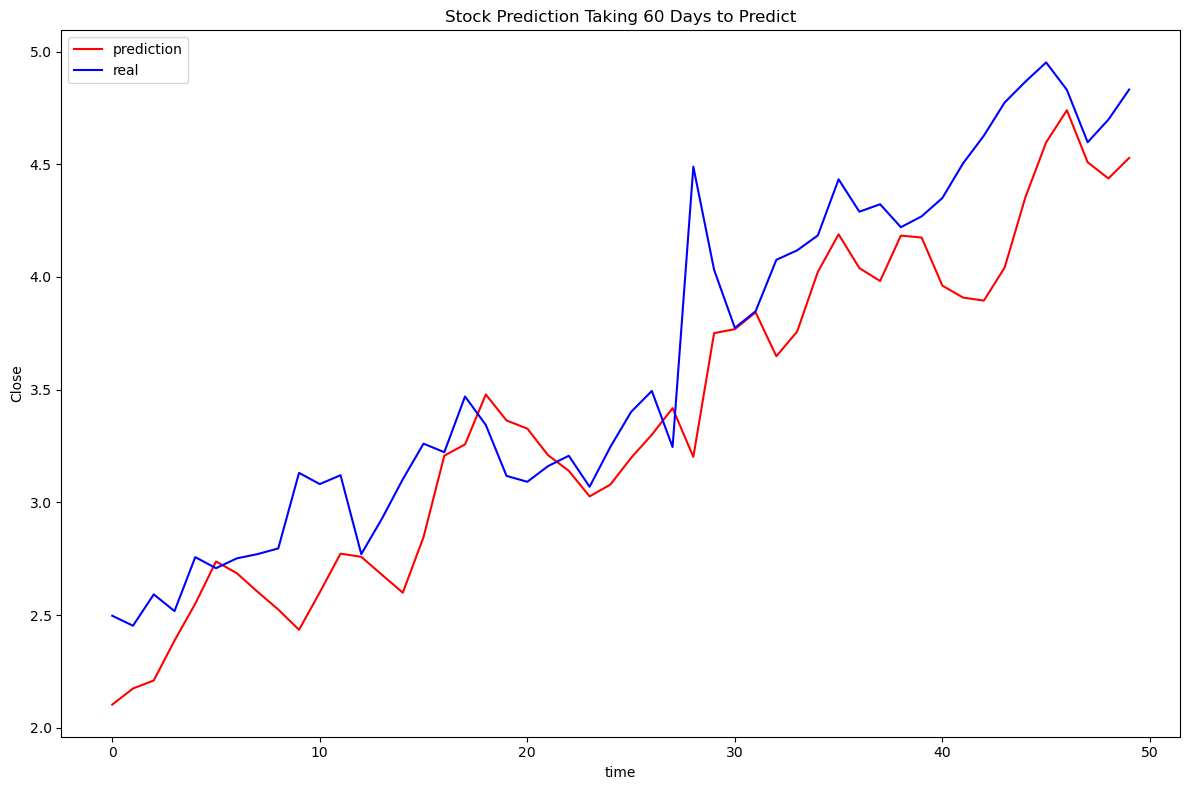

In [15]:
plt.figure(figsize = (12, 8))
plt.plot(y_pred_r, color = 'r', label = 'prediction')
plt.plot(y_test_r, color = 'b', label = 'real')
plt.xlabel('time')
plt.ylabel('Close')
plt.title('Stock Prediction Taking 60 Days to Predict')
plt.tight_layout()
plt.legend()
plt.show()